<a href="https://colab.research.google.com/github/Mahdi-Kriaa/Faulty_Water_Pumps_Predicton/blob/main/faulty_water_pumps_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faulty Water Pumps Prediction**

# Objective
This project aims to leverage machine learning techniques to predict the operational status of water pumps in Tanzania. The goal is to identify faulty water pumps before they fail, allowing for timely maintenance and minimizing downtime. Water supply in Tanzania is critical, and pump failures can have significant impacts on local communities. By predicting these failures, we can ensure a more reliable water supply and improve the quality of life for these communities.


# Data Source and Size
The data for this project comes from Kaggle and it is originally comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water.

Link to dataset : https://www.kaggle.com/datasets/sumeetsawant/pump-it-up-challenge-driven-data?select=training_Set_values.csv https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view

This dataset contains 59400 rows and 41 columns including the target variable.


# Data Dictionary
- amount_tsh: Total static head (amount water available to waterpoint)
- date_recorded: The date the row was entered
- funder: Who funded the well
- gps_height: Altitude of the well
- installer: Organization that installed the well
- longitude: GPS coordinate
- latitude: GPS coordinate
- wpt_name: Name of the waterpoint if there is one
- num_private: is it private
- basin: Geographic water basin
- subvillage: Geographic location
- region: Geographic location
- region_code: Geographic location (coded)
- district_code: Geographic location (coded)
- lga: Geographic location
- ward: Geographic location
- population: Population around the well
- public_meeting: True/False
- recorded_by: Group entering this row of data
- scheme_management: Who operates the waterpoint
- scheme_name: Who operates the waterpoint
- permit: If the waterpoint is permitted
- construction_year: Year the waterpoint was constructed
- extraction_type: The kind of extraction the waterpoint uses
- extraction_type_group: The kind of extraction the waterpoint uses
- extraction_type_class: The kind of extraction the waterpoint uses
- management: How the waterpoint is managed
- management_group: How the waterpoint is managed
- payment: What the water costs
- payment_type: What the water costs
- water_quality: The quality of the water
- quality_group: The quality of the water
- quantity: The quantity of water
- quantity_group: The quantity of water
- source: The source of the water
- source_type: The source of the water
- source_class: The source of the water
- waterpoint_type: The kind of waterpoint
- waterpoint_type_group: The kind of waterpoint
- group_state: Water pump state



# Methodologie
We will explore the dataset and employ various data preprocessing and feature engineering techniques to handle missing values and umbalanced classes, drop useless features and create useful ones. Different machine learning models will be explored, including random forests and gradient boosting, to predict the operational status of the pumps. Model performance will be evaluated based on precision, recall, and F1 scores.

# Imports

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as smt_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, make_scorer, classification_report, confusion_matrix
from sklearn import set_config

# Configuring General Settings

In [ ]:
warnings.filterwarnings("ignore")
set_config(transform_output="pandas")
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# Loading Data

In [ ]:
file_id_features = "1QrNFlZxrLb2vl0zY96LXgNJctH6zprdr"
file_id_target = "1DKPsAit8BHV3TQp1l8tDH6pVMxTTM6O1"
df_features = pd.read_csv(f"https://docs.google.com/uc?id={file_id_features}")
df_target = pd.read_csv(f"https://docs.google.com/uc?id={file_id_target}")

# EDA and Data Cleaning


In [ ]:
print(df_features.shape)
df_features.head(20)

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [ ]:
df_features.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [ ]:
print(df_target.shape)
df_target.head()

(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [ ]:
df_pumps = df_features.merge(df_target, on="id")

In [ ]:
# drop unecessary columns
df_pumps.drop(columns=["id", "recorded_by", "funder"], inplace=True)

"id", "recorded_by" and "funder" columns were dropped because they dont represent a useful information.

In [ ]:
# check duplicates
df_pumps.duplicated().sum()

36

In [ ]:
# replace missing values that are not in nan format by nan
df_pumps.replace(["unknown","None"],np.nan,inplace=True)

In [ ]:
# display normalized number of missing values
sr_nan = (df_pumps.isna().sum())/df_pumps.shape[0]
sr_nan[sr_nan!=0]

installer            0.061549
wpt_name             0.000034
subvillage           0.006246
public_meeting       0.056128
scheme_management    0.065286
scheme_name          0.485017
permit               0.051448
management           0.009444
management_group     0.009444
payment              0.137323
payment_type         0.137323
water_quality        0.031582
quality_group        0.031582
quantity             0.013283
quantity_group       0.013283
source               0.001111
source_class         0.004680
dtype: float64

In [ ]:
def replace_nan_id(df, id, column):
    index = df.index
    values = df.groupby(id).first()[column]
    values_dict = values.to_dict()
    df_reindexed = df.set_index(id)
    df_addressed = df_reindexed[column].fillna(values_dict).reset_index()
    return df_addressed.reindex(index)[column]

In [ ]:
# replace missing values depending on wpt_name
for c in sr_nan[sr_nan != 0].index:
  if c != "wpt_name":
    df_pumps[c] = replace_nan_id(df_pumps,"wpt_name",c)

In [ ]:
# display normalized number of missing values after replacement
sr_nan = (df_pumps.isna().sum())/df_pumps.shape[0]
sr_nan[sr_nan!=0]

installer            0.039579
wpt_name             0.000034
subvillage           0.002896
public_meeting       0.034646
scheme_management    0.039848
scheme_name          0.334007
permit               0.033165
management           0.005219
management_group     0.005219
payment              0.084562
payment_type         0.084562
water_quality        0.016246
quality_group        0.016246
quantity             0.007205
quantity_group       0.007205
source               0.000572
source_class         0.002761
dtype: float64

In [ ]:
# change types
cols = ["construction_year", "num_private", "region_code", "district_code"]
df_pumps[cols] = df_pumps[cols].astype(str)
int_cols = df_pumps.select_dtypes("int").columns
df_pumps[int_cols] = df_pumps[int_cols].astype(float)

In [ ]:
# cardinal of categorical features
cat_cols = df_pumps.select_dtypes("object").columns.delete(0)
for e in cat_cols :
  print(f"{e}: {len(df_pumps[e].unique())}")

installer: 2145
wpt_name: 37400
num_private: 65
basin: 9
subvillage: 19288
region: 21
region_code: 27
district_code: 20
lga: 125
ward: 2092
public_meeting: 3
scheme_management: 12
scheme_name: 2696
permit: 3
construction_year: 55
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6
status_group: 3


In [ ]:
# check for inconsistencies in classes
cat_cols = df_pumps.select_dtypes("object").columns.delete(0)
for c in cat_cols :
  print(f"* {c}: {df_pumps[c].unique()}")

* installer: ['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']
* wpt_name: ['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']
* num_private: ['0' '39' '5' '45' '6' '3' '698' '32' '15' '7' '25' '102' '1' '93' '14'
 '34' '120' '17' '213' '47' '8' '41' '80' '141' '20' '35' '131' '4' '22'
 '11' '87' '61' '65' '136' '2' '180' '38' '62' '9' '16' '23' '42' '24'
 '12' '668' '672' '58' '150' '280' '160' '50' '1776' '30' '27' '10' '94'
 '26' '450' '240' '755' '60' '111' '300' '55' '1402']
* basin: ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
* subvillage: ['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']
* region: ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']
* region_code: ['11' 

In [ ]:
# change values other than 0 to 1 for num_private feature
df_pumps["num_private"] = df_pumps["num_private"].apply(lambda x : "0" if  x == "0" else "1")

In [ ]:
# check identical values in two columns
def   check_identical_columns(data,c1,c2,include_na=False) :
          data.reset_index(drop=True,inplace=True)
          data = data.astype(str).apply(lambda x: x.str.lower())
          n = data.shape[0]
          j = 0
          for i in range(n):
            if data.loc[i,c1] == data.loc[i,c2] :
                j += 1
            if include_na :
                if np.isnan(data.loc[i,c1]) | np.isnan(data.loc[i,c2]) :
                  j += 1
          return j/n

In [ ]:
# check columns that seem to present same information
print("extraction_type / extraction_type_group :",check_identical_columns(df_pumps,"extraction_type","extraction_type_group"))
print("extraction_type / extraction_type_class :",check_identical_columns(df_pumps,"extraction_type","extraction_type_class"))
print("payment / payment_type :",check_identical_columns(df_pumps,"payment","payment_type"))
print("water_quality / quality_group :",check_identical_columns(df_pumps,"water_quality","quality_group"))
print("quantity / quantity_group :",check_identical_columns(df_pumps,"quantity","quantity_group"))
print("source / source_type :",check_identical_columns(df_pumps,"source","source_type"))
print("waterpoint_type / waterpoint_type_group :",check_identical_columns(df_pumps,"waterpoint_type","waterpoint_type_group"))
print("scheme_management / management :",check_identical_columns(df_pumps,"scheme_management","management"))

extraction_type / extraction_type_group : 0.9584343434343434
extraction_type / extraction_type_class : 0.6392929292929292
payment / payment_type : 0.5598316498316498
water_quality / quality_group : 0.11646464646464647
quantity / quantity_group : 1.0
source / source_type : 0.623030303030303
waterpoint_type / waterpoint_type_group : 0.8972558922558923
scheme_management / management : 0.849915824915825


Except the "water_quality / quality_group" pair, columns in each these pairs represent almost the same information so we can the parent features.

In [ ]:
# drop useless features
df_pumps.drop(columns=["extraction_type_group","extraction_type_class","payment_type","quantity_group","source_type","waterpoint_type_group","scheme_management"],inplace=True)

Text(0.5, 1.0, 'water_quality VS quality_group')

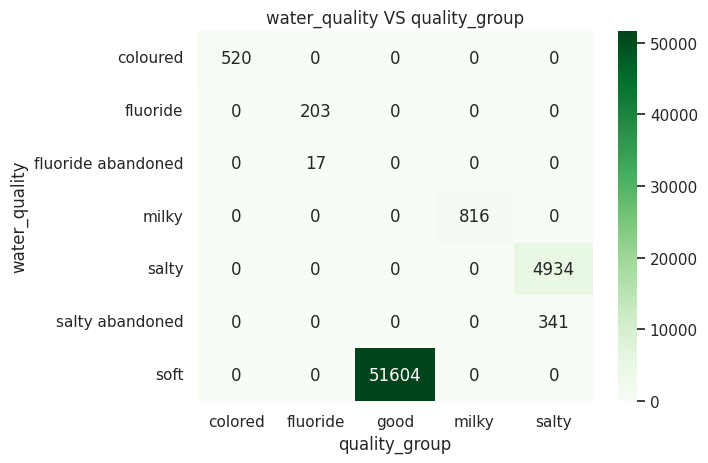

In [ ]:
# display contingency matrix for "water_quality" and "quality_group" features
contingency_table = pd.crosstab(df_pumps['water_quality'],df_pumps['quality_group'])
sns.heatmap(contingency_table, fmt="d", annot=True, cmap="Greens")
plt.title("water_quality VS quality_group")

these two features represent almost the same information so we can drop the "quality group" column (it provide slightly less detailed information)

In [ ]:
# drop "quality_group" feature
df_pumps.drop(columns="quality_group",inplace=True)

In [ ]:
# cardinals of categorical features classes
cat_cols = df_pumps.select_dtypes("object").columns.delete(0)
df_copy = df_pumps.copy()
for c in cat_cols:
  print(f"* {c}:\n{df_copy[c].value_counts()}\n")

* installer:
DWE           17775
Government     1905
RWE            1236
Commu          1079
DANIDA         1067
              ...  
Amadi             1
Sa                1
Water hu          1
Luleka            1
SELEPTA           1
Name: installer, Length: 2144, dtype: int64

* wpt_name:
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37399, dtype: int64

* num_private:
0    58643
1      757
Name: num_private, dtype: int64

* basin:
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruv

In [ ]:
def process_cat_features(data, features, treshold, rep_class, special_classes=[]):
  data[features] = data[features].replace(special_classes, rep_class)
  for cf in features:
      cardinal_classes = data[cf].value_counts()
      n_classes = len(data[cf].dropna().unique())
      if n_classes==1:
          data.drop(columns=cf, inplace=True)
          print(f'- "{cf}" feature was dropped, it is constant')
      class_to_rep = cardinal_classes[cardinal_classes<treshold].index
      n_class_to_rep = len(class_to_rep)
      if n_class_to_rep != 0:
          n = n_classes - n_class_to_rep
          if n==0 :
              data.drop(columns=cf, inplace=True)
              print(f'- "{cf}" feature was dropped, all classes are not representative')
          else:
              data[cf] = data[cf].replace(class_to_rep, rep_class)
              if (n==1) and (data[cf].value_counts()[rep_class] < treshold):
                  data.drop(columns=cf, inplace=True)
                  print(f'- "{cf}" feature was dropped, minority class is not representative')
              elif data[cf].value_counts()[rep_class] < treshold:
                  last_class_over_tresh = cardinal_classes[cardinal_classes>=treshold].index[-1]
                  data[cf] = data[cf].replace(last_class_over_tresh, rep_class)
                  print(f'- "{last_class_over_tresh}" class of the "{cf}" feature has been changed to "{rep_class}"')

In [ ]:
cat_cols = df_pumps.select_dtypes("object").columns.delete([0, 14])
process_cat_features(df_pumps, cat_cols, 1000, "other", ["Other"])

- "num_private" feature was dropped, minority class is not representative
- "subvillage" feature was dropped, all classes are not representative
- "Lindi" class of the "region" feature has been changed to "other"
- "ward" feature was dropped, all classes are not representative
- "parastatal" class of the "management_group" feature has been changed to "other"


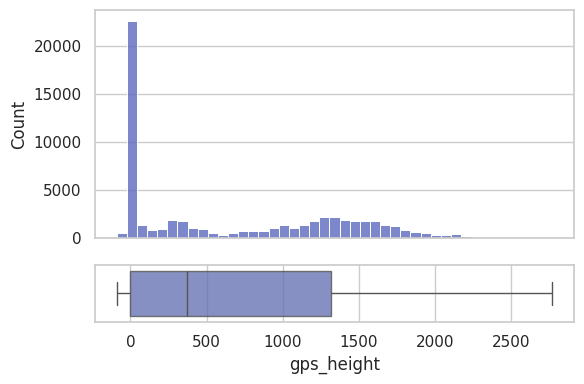

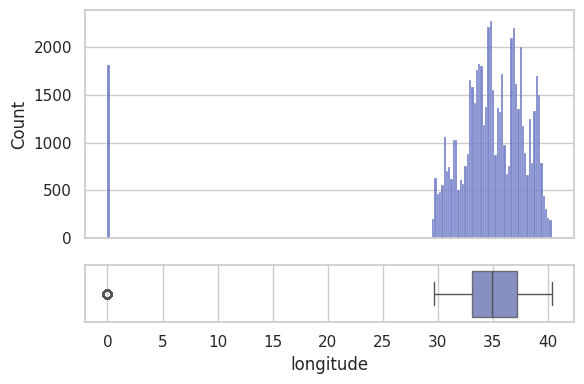

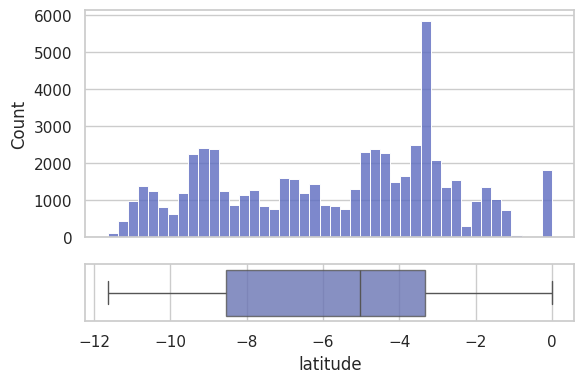

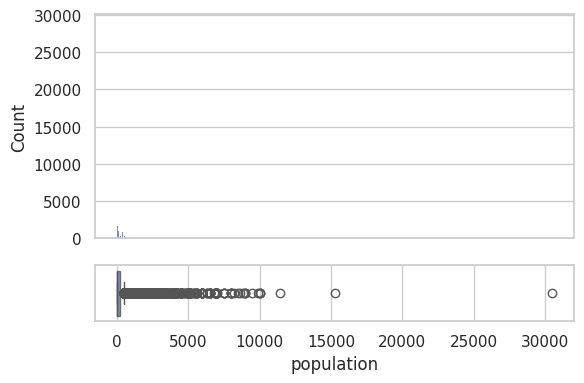

In [ ]:
# histograms and boxplots of numerical variables
num_cols = df_pumps.select_dtypes("float").columns.delete(0)
for c in num_cols:
  gridspec = {'height_ratios':[0.8,0.2]}
  fig, axes = plt.subplots(nrows=2, figsize=(6,4),
                           sharex=True, gridspec_kw=gridspec)
  sns.histplot(data=df_pumps, x=c, color="#5C6BC0", alpha=0.8, ax=axes[0])
  sns.boxplot(data=df_pumps, x=c, color="#5C6BC0", boxprops=dict(alpha=0.8),
              ax=axes[1])
  axes[0].grid(axis="x")
  fig.tight_layout()
  plt.show()

Text(0.5, 1.0, 'Numerical Features Correlations')

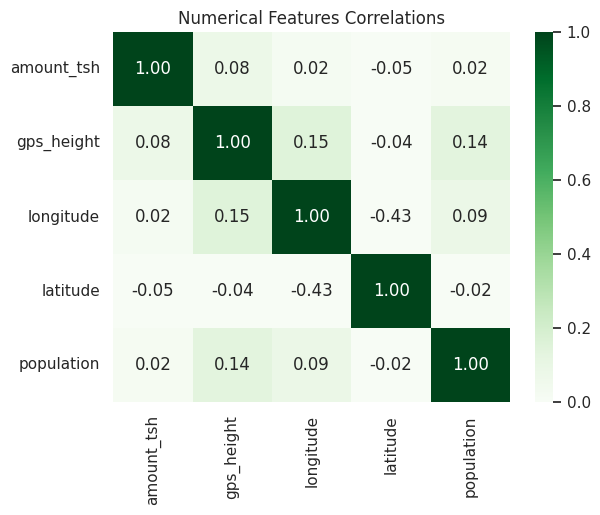

In [ ]:
# numerical variables correlations
corr_matrix = df_pumps.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Greens", vmin=0, vmax=1)
plt.title("Numerical Features Correlations")

There is no correlation between each pair of numerical features

# Feature Engineering

In [ ]:
df_pumps["construction_year"] = df_pumps["construction_year"].astype(float)
mean_year =  df_pumps["construction_year"][df_pumps["construction_year"]!=0].mean().round(0)
df_pumps["construction_year"].replace(0,mean_year,inplace=True)

In [ ]:
# create a feature for operating time
df_pumps["record_year"] = pd.to_datetime(df_pumps.date_recorded).dt.year
df_pumps["operating_time"] = df_pumps["record_year"] - df_pumps["construction_year"].astype("float")
df_pumps.drop(columns=["date_recorded","record_year","construction_year"],inplace=True)

<Axes: xlabel='status_group', ylabel='operating_time'>

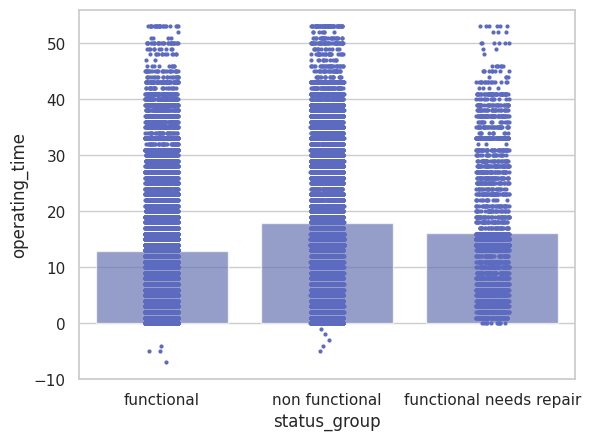

In [ ]:
sns.barplot(data=df_pumps, x="status_group", y="operating_time", errorbar=None, color="#5C6BC0", alpha=0.7)
sns.stripplot(data=df_pumps, x="status_group", y="operating_time", size=3, color="#5C6BC0")

# Data Explanation

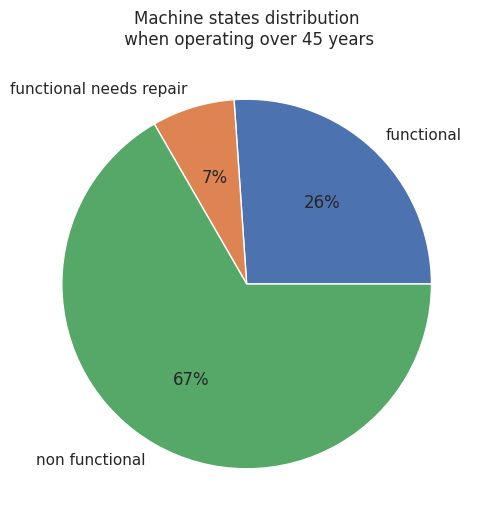

In [ ]:
df_filtred_ot = df_pumps[df_pumps.operating_time>45]
df_filtred_ot["Number_of_states"] = 1
df_filtred_ot = df_filtred_ot.groupby("status_group",as_index=False).sum()
plt.figure(figsize=(6,6))
plt.pie(df_filtred_ot["Number_of_states"], labels=df_filtred_ot["status_group"], autopct='%.0f%%')
plt.title("Machine states distribution\n when operating over 45 years")
plt.show()

The magority of pumps states is non functional when the pump is oprating over 45 years so there is high risk of failure over this operating period.

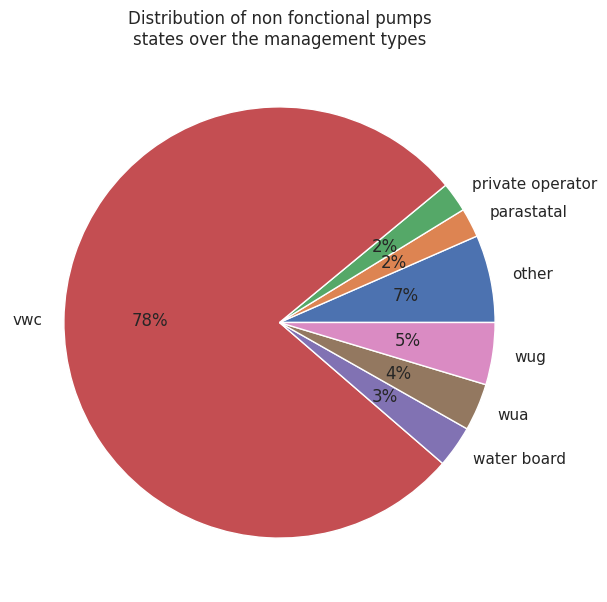

In [ ]:
df_filtred_sg = (df_pumps[df_pumps.status_group=="non functional"]).dropna()
df_filtred_sg["Number_of_states"] = 1
df_filtred_sg = df_filtred_sg.groupby("management", as_index=False).sum()
plt.figure(figsize=(7,7))
plt.pie(df_filtred_sg["Number_of_states"], labels=df_filtred_sg["management"], autopct='%.0f%%')
plt.title("Distribution of non fonctional pumps\nstates over the management types")
plt.show()

The majority of non functional states are vwc managed. So it's most likely that there is a problem with this type of management.

# Modeling and Data Preprocessing

In [ ]:
# define features and target
X = df_pumps.drop(columns="status_group")
y = df_pumps["status_group"]

In [ ]:
# train-test split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15, stratify=y)

In [ ]:
# define different parameters for models
knn_params = dict(knn__n_neighbors=[2,5,20,50,100])
decision_tree_params = dict(decision_tree__max_depth=[5,50,200,1000],
                            decision_tree__min_samples_split=[2,20,50,100])
random_forest_params = dict(random_forest__n_estimators=[5,50,100],
                            random_forest__max_depth=[5,50,200],
                            random_forest__max_features=[0.2, 0.5])
adaboost_params = dict(adaboost__n_estimators= [50, 100],
                       adaboost__learning_rate=[1.0, 0.5])
xgboost_params = dict(xgboost__n_estimators= [100, 200, 400],
                                   xgboost__max_depth=[5,20, 100],
                                   xgboost__learning_rate= [0.05, 0.1])
stacking_classifier_params = dict(stacking_classifier__estimators = [[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                                  ('svr',LinearSVC(dual=False, random_state=42, penalty="l1"))],
                                   [('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
                                  ('svr', LinearSVC(dual=False, random_state=42, penalty="l2"))]])

In [ ]:
models_dict = dict(knn=[KNeighborsClassifier(), knn_params],
                   decision_tree=[DecisionTreeClassifier(), decision_tree_params],
                   random_forest=[RandomForestClassifier(), random_forest_params],
                   adaboost=[AdaBoostClassifier(), adaboost_params],
                   xgboost=[XGBClassifier(subsample=.8, colsample_bytree=.8), xgboost_params],
                   stacking_classifier=[StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                                  ('svr',LinearSVC(dual=False, random_state=42, penalty="l2"))]), stacking_classifier_params])

In [ ]:
# define numerical and categorical columns
num_cols = X_train.select_dtypes(float).columns
cat_cols = X_train.select_dtypes(object).columns
# create a column transformer for features
cols_transformer = ColumnTransformer((("num_transformer",StandardScaler(), num_cols),
                                    ("cat_transformer",make_pipeline(SimpleImputer(strategy="most_frequent"),
                                                                                OneHotEncoder(sparse_output=False)), cat_cols)))
# create an encoder for the target
label_encoder = LabelEncoder()
# fit and transform training target
y_train_encoded = label_encoder.fit_transform(y_train)
# transform test_target
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# display the correspondent classe for each integer
integer_mapping = {i: l for i, l in enumerate(label_encoder.classes_)}
integer_mapping

{0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

As the non-functional state is the more critical one, we will focus on the f1 score for this class. this score is choosen to evaluate precision (we must avoid false positives because it will generate an unnecessary maintenance costs) and recall (we want to predict all states of pump failure).

# Model Evaluation and Improvement

In [ ]:
def  train_test_cls_reports(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    cls_report_train = classification_report(y_train_encoded, pipeline.predict(X_train))
    cls_report_test = classification_report(y_test_encoded, pipeline.predict(X_test))
    print(f"* {pipeline.steps[-1][0]} - Training Set\n{cls_report_train}\n* {pipeline.steps[-1][0]} - Testing Set\n{cls_report_test}")

In [ ]:
for model in models_dict.keys():
  pipeline = Pipeline([("preprocessor",cols_transformer),(model,models_dict[model][0])])
  train_test_cls_reports(pipeline, X_train, X_test, y_train_encoded, y_test_encoded)

* knn - Training Set
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     22581
           1       0.67      0.42      0.51      3022
           2       0.88      0.79      0.83     15977

    accuracy                           0.83     41580
   macro avg       0.79      0.71      0.74     41580
weighted avg       0.83      0.83      0.83     41580

* knn - Testing Set
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      9678
           1       0.46      0.29      0.36      1295
           2       0.80      0.72      0.76      6847

    accuracy                           0.77     17820
   macro avg       0.68      0.63      0.64     17820
weighted avg       0.76      0.77      0.76     17820

* decision_tree - Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22581
           1       0.99      0.97      0.98      3022
   

For a default tuing, the random forest model has the best class 2 f1 score (0.80)

In [ ]:
for model in list(models_dict.keys()):
  pipeline = Pipeline([("preprocessor",cols_transformer),(model,models_dict[model][0])])
  grid_search = GridSearchCV(pipeline, models_dict[model][1],
                            scoring=make_scorer(f1_score, labels=[2], average='micro'), error_score="raise")
  grid_search.fit(X_train, label_encoder.fit_transform(y_train))
  print(f"* {model}\n  - Best Score: {grid_search.best_score_}\n  - Best Parameters: {grid_search.best_params_}")

* knn
  - Best Score: 0.7480758584698848
  - Best Parameters: {'knn__n_neighbors': 5}
* decision_tree
  - Best Score: 0.7516843556118328
  - Best Parameters: {'decision_tree__max_depth': 50, 'decision_tree__min_samples_split': 2}
* random_forest
  - Best Score: 0.7996716990693545
  - Best Parameters: {'random_forest__max_depth': 50, 'random_forest__max_features': 0.2, 'random_forest__n_estimators': 100}
* adaboost
  - Best Score: 0.6919274920738356
  - Best Parameters: {'adaboost__learning_rate': 1.0, 'adaboost__n_estimators': 100}
* xgboost
  - Best Score: 0.7999926738841182
  - Best Parameters: {'xgboost__learning_rate': 0.05, 'xgboost__max_depth': 20, 'xgboost__n_estimators': 100}
* stacking_classifier
  - Best Score: 0.7996736224008598
  - Best Parameters: {'stacking_classifier__estimators': [('rf', RandomForestClassifier(n_estimators=50, random_state=42)), ('svr', LinearSVC(dual=False, random_state=42))]}


The XGBoost classifier has the best score so it is the most generalized model.

In [ ]:
# define XGBoost model tuned with the best tested parameters
xgboost = XGBClassifier(learning_rate=0.05, max_depth=20, n_estimators=100)
# create a pipeline
pipeline = Pipeline([("preprocessor",cols_transformer),("XGBoost",xgboost)])
# display metrics
train_test_cls_reports(pipeline, X_train, X_test, y_train_encoded, y_test_encoded)

* XGBoost - Training Set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     22581
           1       0.94      0.78      0.85      3022
           2       0.98      0.94      0.96     15977

    accuracy                           0.95     41580
   macro avg       0.95      0.90      0.93     41580
weighted avg       0.95      0.95      0.95     41580

* XGBoost - Testing Set
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      9678
           1       0.53      0.30      0.38      1295
           2       0.83      0.77      0.80      6847

    accuracy                           0.80     17820
   macro avg       0.72      0.65      0.67     17820
weighted avg       0.79      0.80      0.79     17820



In [ ]:
# use XGboost model with PCA
cols_transformer_pca = ColumnTransformer((("num_transformer",make_pipeline(StandardScaler(),PCA(n_components=0.95)), num_cols),
                                    ("cat_transformer",make_pipeline(SimpleImputer(strategy="most_frequent"),
                                                                                OneHotEncoder(sparse_output=False)), cat_cols)))
pipeline = Pipeline([("preprocessor",cols_transformer_pca),("XGBoost with PCA",xgboost)])
train_test_cls_reports(pipeline, X_train, X_test, y_train_encoded, y_test_encoded)

* XGBoost with PCA - Training Set
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22581
           1       0.94      0.81      0.87      3022
           2       0.98      0.95      0.97     15977

    accuracy                           0.96     41580
   macro avg       0.96      0.91      0.93     41580
weighted avg       0.96      0.96      0.96     41580

* XGBoost with PCA - Testing Set
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      9678
           1       0.52      0.30      0.38      1295
           2       0.81      0.76      0.78      6847

    accuracy                           0.79     17820
   macro avg       0.71      0.64      0.66     17820
weighted avg       0.78      0.79      0.78     17820



The performance of the model decreased by PCA

In [ ]:
# use XGboost model with a SMOTE
cols_transformer_pca = ColumnTransformer((("num_transformer",make_pipeline(StandardScaler()), num_cols),
                                    ("cat_transformer",make_pipeline(SimpleImputer(strategy="most_frequent"),
                                                                                OneHotEncoder(sparse_output=False)), cat_cols)))
pipeline = smt_pipeline([("preprocessor",cols_transformer_pca),("smote",SMOTE()),("XGBoost",xgboost)])
pipeline.fit(X_train, y_train_encoded)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
cls_report_train = classification_report(y_train_encoded, y_train_pred)
cls_report_test = classification_report(y_test_encoded, y_test_pred)
print(f"* XGBoost with SMOTE - Training Set\n{cls_report_train}\n* XGBoost with SMOTE - Testing Set\n{cls_report_test}")

* XGBoost with SMOTE - Training Set
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     22581
           1       0.73      0.91      0.81      3022
           2       0.97      0.93      0.95     15977

    accuracy                           0.94     41580
   macro avg       0.89      0.93      0.90     41580
weighted avg       0.94      0.94      0.94     41580

* XGBoost with SMOTE - Testing Set
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      9678
           1       0.41      0.47      0.44      1295
           2       0.82      0.77      0.80      6847

    accuracy                           0.78     17820
   macro avg       0.68      0.69      0.69     17820
weighted avg       0.79      0.78      0.79     17820



The F1 score for the "non functional" class still the same by SMOTE resampling but for the "functional need repair" class, it was improved, so we will keep the SMOTE resampling in the model training.

# Model Interpretation

Text(0.5, 1.0, 'Testing Set Confusion Matrix')

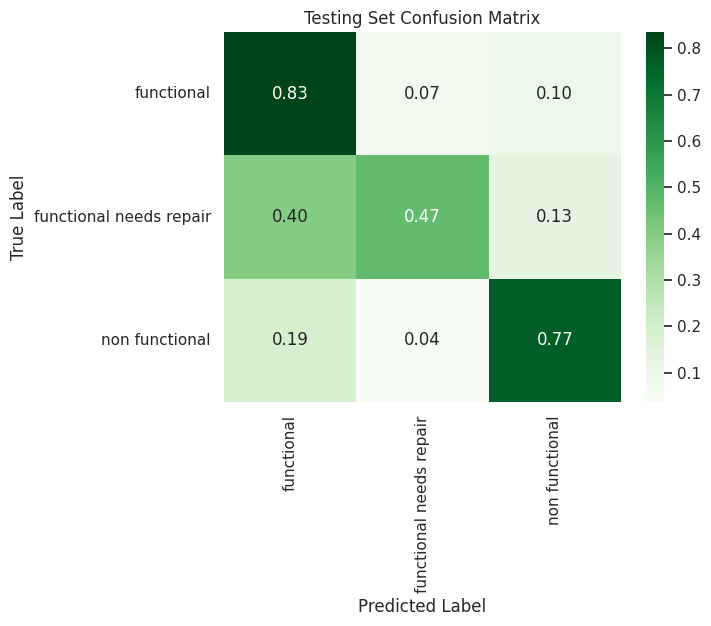

In [ ]:
cm = confusion_matrix(y_test_encoded,y_test_pred, normalize="true")
sns.heatmap(cm, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot=True, fmt=".2f", cmap="Greens")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Testing Set Confusion Matrix")

77% of the non functional states were detected by the model which allow to signicantly avoid pumps failures. Face to states where the pump is functional but needs repair, the model is less efficient with only 47% from these states were truly predicted.

In [ ]:
# display feature importances depending on the mean decrease in impurity
data = list(zip(xgboost.feature_names_in_, xgboost.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
126,cat_transformer__quantity_dry,0.199552
27,cat_transformer__region_Iringa,0.132280
76,cat_transformer__lga_Bariadi,0.031438
80,cat_transformer__lga_Meru,0.022173
100,cat_transformer__extraction_type_other,0.020881
...,...,...
51,cat_transformer__region_code_15,0.000000
49,cat_transformer__region_code_13,0.000000
48,cat_transformer__region_code_12,0.000000
46,cat_transformer__region_code_10,0.000000


The "quantity" and "region" features have significant importance for the model.

# Conclusion

The model has a good performance on detecting states of non functinality, but it is weak face to states where the water pump is functional but needs repair so using it to detect these states is not reliable.